In [73]:
#importing the necessary libraries
import numpy as np 
import pandas as pd 
import edhec_risk_kit_206 as erk
import matplotlib.pyplot as plt
import seaborn as sns 


In [74]:
#Reading stock prices for 20 companies 
stock_prices_daily = pd.read_csv(r'stock_data2.csv', index_col=0, parse_dates=True)

In [75]:
 stock_prices_daily.head()

,ABBV,ARCC,AVGO,BABA,CVX,DIS,DRE,ECL,EPD,INTC,MS,NEE,OKE,PYPL,ROK,SBUX,T,TEAM,TSLA,WMT
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,45.521305,8.890103,120.904404,76.690002,71.638252,97.155785,17.590481,106.197899,18.808992,29.714636,27.818462,21.718426,18.182983,34.750000,91.131165,52.970352,25.432276,27.410000,44.681999,54.540787
2016-01-05,45.331665,8.970029,116.859558,78.629997,72.251015,95.193428,17.826033,106.584976,18.645372,29.574759,27.641729,21.930223,18.197329,34.310001,90.314301,53.324947,25.609972,26.770000,44.686001,55.836418
2016-01-06,45.339561,8.939287,113.265015,77.330002,69.396790,94.683952,17.573656,102.025154,17.848625,28.919096,26.952450,21.858925,17.372463,33.980000,87.899559,52.852169,25.572432,27.049999,43.807999,56.395512
2016-01-07,45.205238,8.656477,109.662018,72.720001,66.937637,93.872604,17.077320,99.381767,17.201267,27.835068,25.609251,21.955385,16.339582,33.130001,83.869049,51.542908,25.159489,26.969999,43.130001,57.708874
2016-01-08,43.972576,8.551959,108.939743,70.800003,66.220039,93.636742,16.715590,98.513214,17.251060,27.546576,25.079033,22.053946,16.533245,32.689999,83.904961,51.488361,25.182014,27.170000,42.200001,56.386627


In [76]:
stock_prices_daily.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [77]:
#calculating returns
stock_returns_daily = stock_prices_daily.pct_change()

In [78]:
stock_returns_daily.head()

,ABBV,ARCC,AVGO,BABA,CVX,DIS,DRE,ECL,EPD,INTC,MS,NEE,OKE,PYPL,ROK,SBUX,T,TEAM,TSLA,WMT
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.004166,0.008990,-0.033455,0.025297,0.008554,-0.020198,0.013391,0.003645,-0.008699,-0.004707,-0.006353,0.009752,0.000789,-0.012662,-0.008964,0.006694,0.006987,-0.023349,0.000090,0.023755
2016-01-06,0.000174,-0.003427,-0.030760,-0.016533,-0.039504,-0.005352,-0.014158,-0.042781,-0.042732,-0.022170,-0.024936,-0.003251,-0.045329,-0.009618,-0.026737,-0.008866,-0.001466,0.010459,-0.019648,0.010013
2016-01-07,-0.002963,-0.031637,-0.031810,-0.059615,-0.035436,-0.008569,-0.028243,-0.025909,-0.036269,-0.037485,-0.049836,0.004413,-0.059455,-0.025015,-0.045854,-0.024772,-0.016148,-0.002957,-0.015477,0.023288
2016-01-08,-0.027268,-0.012074,-0.006586,-0.026403,-0.010720,-0.002513,-0.021182,-0.008740,0.002895,-0.010364,-0.020704,0.004489,0.011852,-0.013281,0.000428,-0.001058,0.000895,0.007416,-0.021563,-0.022912


In [79]:
#droping missing values
stock_returns_daily = stock_returns_daily.dropna()


In [80]:
stock_returns_daily.head()

,ABBV,ARCC,AVGO,BABA,CVX,DIS,DRE,ECL,EPD,INTC,MS,NEE,OKE,PYPL,ROK,SBUX,T,TEAM,TSLA,WMT
Date,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.004166,0.008990,-0.033455,0.025297,0.008554,-0.020198,0.013391,0.003645,-0.008699,-0.004707,-0.006353,0.009752,0.000789,-0.012662,-0.008964,0.006694,0.006987,-0.023349,0.000090,0.023755
2016-01-06,0.000174,-0.003427,-0.030760,-0.016533,-0.039504,-0.005352,-0.014158,-0.042781,-0.042732,-0.022170,-0.024936,-0.003251,-0.045329,-0.009618,-0.026737,-0.008866,-0.001466,0.010459,-0.019648,0.010013
2016-01-07,-0.002963,-0.031637,-0.031810,-0.059615,-0.035436,-0.008569,-0.028243,-0.025909,-0.036269,-0.037485,-0.049836,0.004413,-0.059455,-0.025015,-0.045854,-0.024772,-0.016148,-0.002957,-0.015477,0.023288
2016-01-08,-0.027268,-0.012074,-0.006586,-0.026403,-0.010720,-0.002513,-0.021182,-0.008740,0.002895,-0.010364,-0.020704,0.004489,0.011852,-0.013281,0.000428,-0.001058,0.000895,0.007416,-0.021563,-0.022912
2016-01-11,-0.031806,-0.006470,-0.001248,-0.012429,-0.016559,0.006751,0.008052,0.002587,-0.047423,0.017455,0.002819,0.003898,-0.019089,0.010707,-0.000214,0.021013,0.012224,-0.001840,-0.014929,0.010702


In [81]:
# converting  daily stocks returns to monthly
stock_returns_monthly = stock_returns_daily.resample('M').apply(erk.compound).to_period('M')

In [82]:
stock_returns_monthly.head()

,ABBV,ARCC,AVGO,BABA,CVX,DIS,DRE,ECL,EPD,INTC,MS,NEE,OKE,PYPL,ROK,SBUX,T,TEAM,TSLA,WMT
Date,,,,,,,,,,,,,,,,,,,,
2016-01,-0.037032,-0.038728,-0.060233,-0.125962,-0.026787,-0.069528,-0.037303,-0.041070,-0.079525,-0.087379,-0.173024,0.078594,0.009484,0.040000,-0.058609,0.043083,0.064554,-0.242247,-0.144174,0.079727
2016-02,-0.005282,-0.017266,0.001945,0.026555,-0.022802,-0.003131,0.036989,-0.049319,-0.022585,-0.037703,-0.045595,0.017560,-0.036531,0.055340,0.097477,-0.038996,0.024681,0.144439,0.003818,-0.000301
2016-03,0.045962,0.116672,0.157062,0.148525,0.143336,0.039678,0.089942,0.091098,0.053487,0.093275,0.012551,0.048928,0.244166,0.012061,0.092804,0.025597,0.060081,0.058056,0.197155,0.040052
2016-04,0.078189,0.023585,-0.056634,-0.026446,0.071069,0.039774,-0.029725,0.034241,0.100023,-0.063988,0.087890,-0.006422,0.231074,0.015026,-0.002461,-0.058124,0.003354,-0.078728,0.047830,-0.023653
2016-05,0.031639,-0.023042,0.059074,0.065765,-0.001099,-0.039125,0.090797,0.019655,0.040090,0.052275,0.011456,0.029120,0.196404,-0.035477,0.029288,-0.020415,0.008501,-0.025896,-0.072811,0.066221


In [83]:
#Summary  stats for companies 
erk.summary_stats(stock_returns_monthly)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
ABBV,0.182546,0.284198,0.200178,3.548615,0.110904,0.156445,0.522112,-0.390315
ARCC,0.133709,0.241853,-1.828142,15.245074,0.115215,0.168317,0.416978,-0.410662
AVGO,0.291741,0.256276,-0.433532,3.356839,0.104657,0.143938,0.993893,-0.236978
BABA,0.254613,0.320451,-0.036450,2.551827,0.129426,0.160000,0.681888,-0.329042
CVX,0.035598,0.275043,0.706929,6.314778,0.101740,0.161487,0.019487,-0.406641
DIS,0.132722,0.266207,0.804243,4.701084,0.091160,0.135903,0.375273,-0.358895
DRE,0.175314,0.173645,0.159288,3.114225,0.064605,0.091361,0.814367,-0.142516
ECL,0.151758,0.212409,0.998478,6.361159,0.063881,0.098448,0.557712,-0.239020
EPD,0.007758,0.294054,-1.037827,9.949447,0.145248,0.194137,-0.074056,-0.509094
INTC,0.104081,0.248695,-0.481469,3.664866,0.114708,0.159649,0.289600,-0.295271


In [84]:
#cummulating montly returnd
cum_monthly_returns = ((stock_returns_monthly +1).cumprod())

Text(0.5, 1.0, 'Cummulative returns for 20 companies')

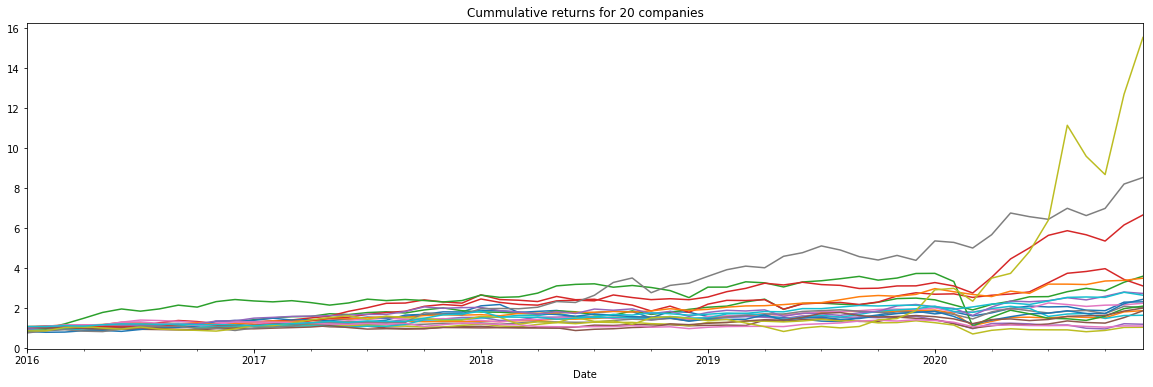

In [85]:
cum_monthly_returns.plot(legend=False, figsize=(20, 6))
plt.title("Cummulative returns for 20 companies")

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.196957,0.194826,-1.803064,7.654761,0.093545,0.123176,0.833893,-0.234517
EW,0.344856,0.244887,-0.430491,4.560546,0.092482,0.119189,1.251363,-0.226747
GMV_SHRINKAGE,0.175165,0.199232,-1.783550,7.943875,0.096945,0.129733,0.708953,-0.246052


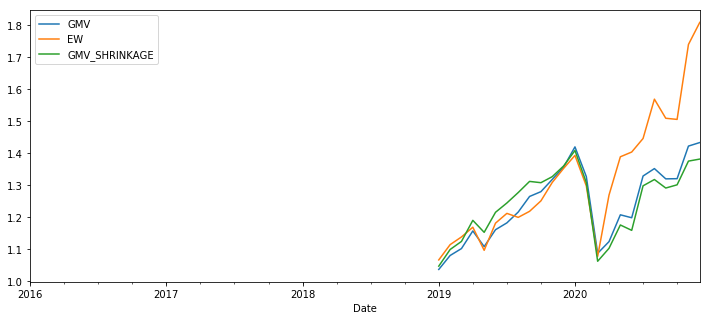

In [86]:
#constructing the GMV portfolio 
gmv = erk.backtest_ws(r=stock_returns_monthly,estimation_window=36, weighting=erk.weight_gmv,cov_estimator=erk.sample_cov )
ew_port = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_ew)
gmv_shrink = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov)
btr= pd.DataFrame({'GMV':gmv, 'EW':ew_port, 'GMV_SHRINKAGE':gmv_shrink})
(1+btr).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr.dropna())


In [87]:
#calculating covariance matrix using shronkage method
cov_shrinkage = erk.shrinkage_cov(stock_returns_monthly)

In [88]:
cov_shrinkage

,ABBV,ARCC,AVGO,BABA,CVX,DIS,DRE,ECL,EPD,INTC,MS,NEE,OKE,PYPL,ROK,SBUX,T,TEAM,TSLA,WMT
ABBV,0.006731,0.002000,0.001721,0.001709,0.002548,0.001830,0.000545,0.001518,0.002347,0.001739,0.002819,0.000303,0.003598,0.002127,0.002442,0.001298,0.001331,0.002574,0.004422,0.000716
ARCC,0.002000,0.004874,0.002132,0.001580,0.002945,0.002589,0.000956,0.002321,0.003310,0.001778,0.003325,0.000667,0.005544,0.002284,0.002572,0.001939,0.001666,0.002300,0.004741,0.000744
AVGO,0.001721,0.002132,0.005473,0.002489,0.002242,0.002243,0.001122,0.001868,0.002141,0.002187,0.002662,0.000546,0.003583,0.002096,0.002510,0.001809,0.001210,0.002293,0.004661,0.000810
BABA,0.001709,0.001580,0.002489,0.008557,0.001663,0.001367,0.001462,0.001399,0.002122,0.001869,0.002369,0.000937,0.003324,0.002193,0.003173,0.001242,0.000959,0.002793,0.004470,0.000995
CVX,0.002548,0.002945,0.002242,0.001663,0.006304,0.002643,0.001242,0.002617,0.003727,0.002065,0.003341,0.000569,0.005849,0.002243,0.002931,0.002057,0.002000,0.002055,0.004654,0.001177
DIS,0.001830,0.002589,0.002243,0.001367,0.002643,0.005906,0.000937,0.001947,0.002883,0.001395,0.003500,0.000586,0.004213,0.002152,0.002458,0.002039,0.001483,0.002242,0.004917,0.001093
DRE,0.000545,0.000956,0.001122,0.001462,0.001242,0.000937,0.002513,0.000920,0.001290,0.000847,0.001141,0.000888,0.001958,0.001016,0.001152,0.000940,0.000941,0.001341,0.002206,0.000746
ECL,0.001518,0.002321,0.001868,0.001399,0.002617,0.001947,0.000920,0.003760,0.002611,0.001788,0.002340,0.000547,0.004174,0.001985,0.001995,0.001875,0.001293,0.002325,0.003905,0.001067
EPD,0.002347,0.003310,0.002141,0.002122,0.003727,0.002883,0.001290,0.002611,0.007206,0.001716,0.003486,0.000798,0.007073,0.002513,0.003217,0.002255,0.002087,0.002838,0.004929,0.000960
INTC,0.001739,0.001778,0.002187,0.001869,0.002065,0.001395,0.000847,0.001788,0.001716,0.005154,0.002255,0.000482,0.003047,0.001625,0.002164,0.001375,0.001087,0.002758,0.003955,0.000901


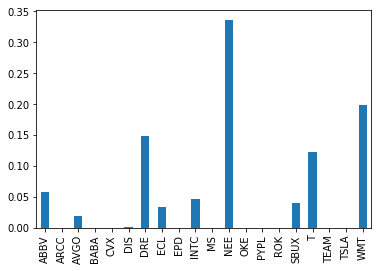

In [89]:
#using weights of gmv porfolio to find risk contributions
weights = erk.weight_gmv(stock_returns_monthly,erk.shrinkage_cov)
erk.risk_contribution(weights, cov_shrinkage).plot(kind='bar')

In [90]:
equal_risk_weights = erk.equal_risk_contributions(cov_shrinkage)

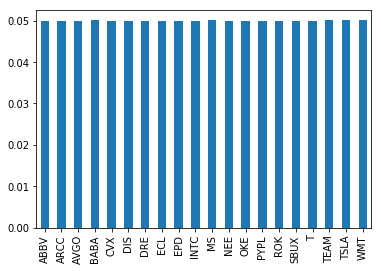

In [91]:
#equal risk contribution portfolio
erk.risk_contribution(equal_risk_weights, cov_shrinkage).plot(kind='bar')

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.196957,0.194826,-1.803064,7.654761,0.093545,0.123176,0.833893,-0.234517
EW,0.344856,0.244887,-0.430491,4.560546,0.092482,0.119189,1.251363,-0.226747
GMV_SHRINKAGE,0.175165,0.199232,-1.783550,7.943875,0.096945,0.129733,0.708953,-0.246052
ERC,0.278301,0.221203,-0.816950,4.998984,0.091370,0.120629,1.092435,-0.228877


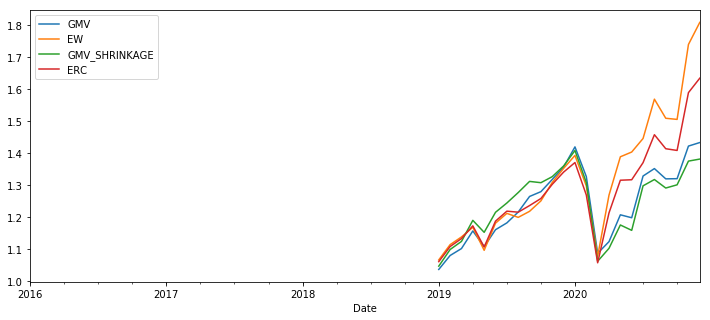

In [92]:
#backtesting portfolios
gmv = erk.backtest_ws(r=stock_returns_monthly,estimation_window=36, weighting=erk.weight_gmv,cov_estimator=erk.sample_cov )
ew_port = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_ew)
gmv_shrink = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov)
equal_risk = erk.backtest_ws(r=stock_returns_monthly, estimation_window=36, weighting=erk.weight_erc, cov_estimator=erk.shrinkage_cov)
btr= pd.DataFrame({'GMV':gmv, 'EW':ew_port, 'GMV_SHRINKAGE':gmv_shrink, 'ERC':equal_risk})
(1+btr).cumprod().plot(figsize=(12,5))
erk.summary_stats(btr.dropna())

In [93]:
#montly portfolio returns
port_returns = stock_returns_monthly.mul(equal_risk_weights, axis=1).sum(axis=1)
port_returns.head()

Date
2016-01   -0.025322
2016-02    0.007557
2016-03    0.077804
2016-04    0.006907
2016-05    0.027138
Freq: M, dtype: float64

In [94]:
#creating column for portfolio monthly returns
stock_returns_monthly['portfolio_returns'] = port_returns

In [95]:
#cummulative portfolio returns
port_cum_ret = ((1+port_returns).cumprod()-1)

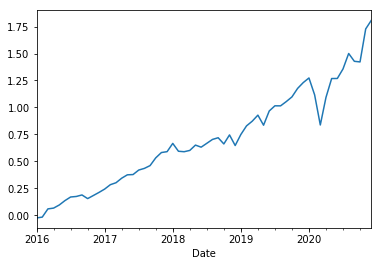

In [96]:
#plotting portfolio cummulative returns
port_cum_ret.plot()

In [97]:
returns_monthly = pd.DataFrame(port_returns, columns=['portfolio_return'])

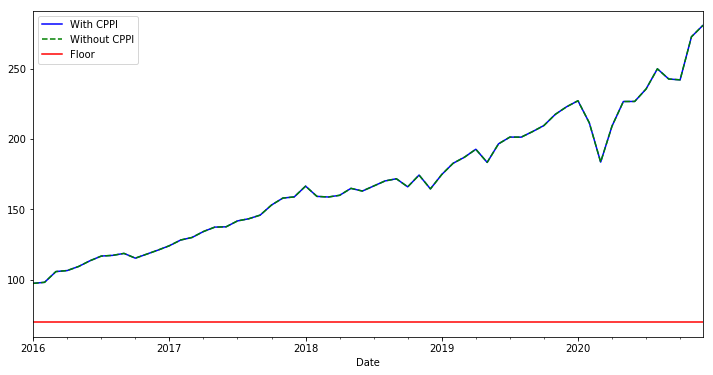

In [98]:
returns =returns_monthly
cppi, floor_values = erk.cppi1(returns_monthly)
normal = 100*(1+returns).cumprod()
chart = cppi.plot(figsize=(12,6), color="blue", legend=True)
normal.plot(ax=chart, style='g--', legend=True)
floor_values.plot(ax=chart, style='red', legend=True)
chart.legend(['With CPPI','Without CPPI','Floor'])
        

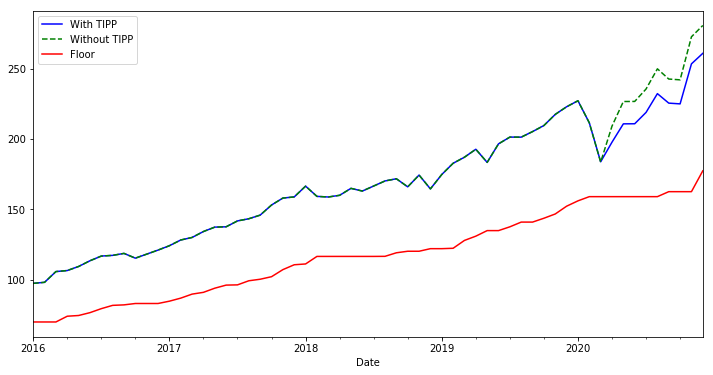

In [99]:
#implementing tipp strategy
returns = returns_monthly
tipp, floor_values = erk.tipp(returns, m=4, gap=1)
normal = 100*(1+returns).cumprod()
chart = tipp.plot(figsize=(12,6), color="blue", legend=True)
normal.plot(ax=chart, style='g--', legend=True)
floor_values.plot(ax=chart, style='red', legend=True)
chart.legend(['With TIPP','Without TIPP','Floor'])
    

In [100]:
# weights that have equal risk contribution 
stock_columns = stock_prices_daily.columns
risk_parity_weights = pd.DataFrame(equal_risk_weights, index=stock_columns)
risk_parity_weights

,0
ABBV,0.048864
ARCC,0.043421
AVGO,0.046440
BABA,0.044868
CVX,0.039347
DIS,0.044515
DRE,0.078778
ECL,0.050138
EPD,0.036797
INTC,0.052120


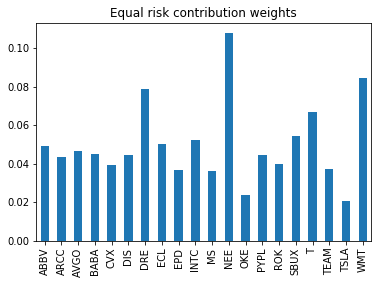

In [101]:
risk_parity_weights.plot(kind='bar', legend=False, title='Equal risk contribution weights')